In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import integrate
from scipy import interpolate
from scipy import signal
from scipy import special
from scipy import constants
from scipy import linalg
from scipy import fftpack
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import find_peaks_cwt
from scipy.signal import argrelextrema
import fnmatch
import scipy as sp

In [2]:
data = np.loadtxt('Eloise.txt', skiprows=4)
t = data[:,0]
x = data[:,1]

x_true = x-(1/2*max(x))

x_t_lim = x_true[0:500]
x_t_lim2 = x_true[500:1000]
x_t_lim3 = x_true[1000:1500]
x_t_lim4 = x_true[2000:2500]
x_t_lim5 = x_true[3000:3500]
print(max(x_t_lim))
print(max(x_t_lim2))
print(max(x_t_lim3))
print(max(x_t_lim4))
print(max(x_t_lim5))
# print(max(x_t_lim4))


74.15645
70.63104999999999
68.36695
63.57184999999998
59.17935


[ 16.93671608   2.45098404 -22.15844774]


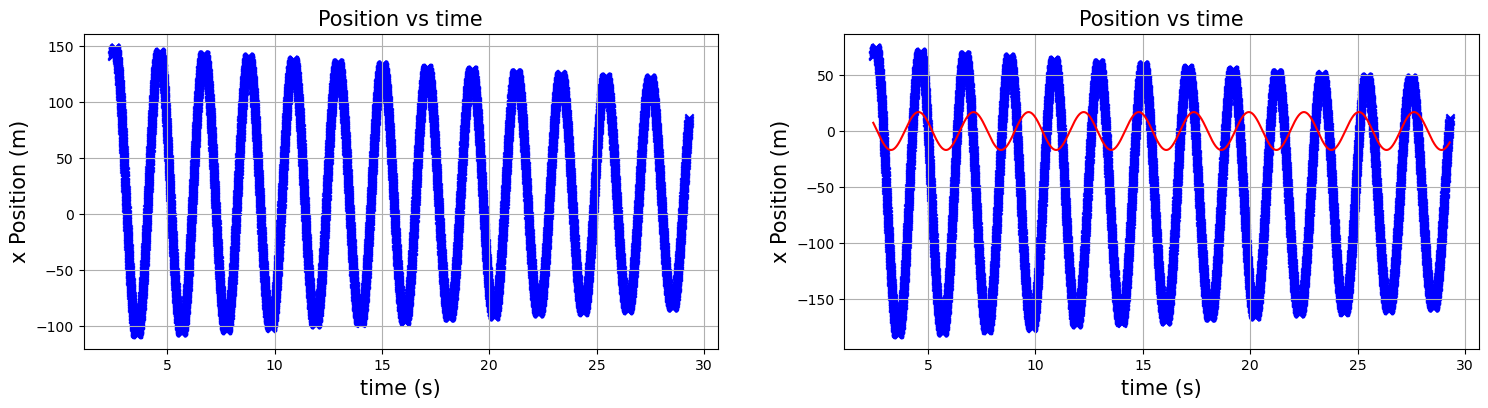

In [3]:
text_size_plots = 15
text_size_axes = 15



def best_fit(x_true, a, b, c):
    return a*(np.sin(b*x_true+c))

params, params_covariance = curve_fit(best_fit, t, x_true, p0=[1, 1, 1])
print(params)



plt.figure(figsize=(18,9))



plt.subplot(221)
plt.scatter(t,x,marker="x",color="b",)
plt.grid(True)
plt.title("Position vs time", size=text_size_plots)
plt.xlabel("time (s)", size=text_size_plots)
plt.ylabel("x Position (m)", size=text_size_plots)

plt.subplot(222)
plt.scatter(t,x_true,marker="x",color="b",)
plt.plot(t, best_fit(t, params[0], params[1], params[2]), color='r')
plt.grid(True)
plt.title("Position vs time", size=text_size_plots)
plt.xlabel("time (s)", size=text_size_plots)
plt.ylabel("x Position (m)", size=text_size_plots)



plt.show()


In [4]:
x_peaks,peak = sp.signal.find_peaks(x_true, height=0.01, distance=600)
from numbers import Number




print(x_peaks)
print(peak)


t1 = (t[27])
t2 = (t[1034])
t3 = (t[2025])-1.61499
t4 = (t[3019])-1.61499
t5 = (t[4029])-1.61499
t6 = (t[5026])-1.61499
t7 = (t[6029])-1.61499
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)
print(t7)
s = (t1+t2+t3+t4+t5+t6+t7)
# s_T = s/
print(s_T)

# for x in peaks:
#     if np.any(x) == 0.21082675 or np.any(x) == 0.21538585:
#         print(X)

[  27 1034 2025 3019 4029 5026 6029]
{'peak_heights': array([74.15645, 68.36695, 63.57185, 59.17935, 54.74175, 50.60535,
       47.51495])}
2.56
6.748333
9.25334
13.38501
17.58501
21.73001
25.90001


NameError: name 's_T' is not defined

In [ ]:
avg_x = np.average(x)
x_scaled = (x-avg_x)



period_i = 0
period_f = 1548
t_p = t[period_i:period_f]
x_p = x[period_i:period_f]
t_x_p =argrelextrema(x_p, np.greater_equal)
x_p[argrelextrema(x_p, np.greater_equal)[0]]

array([-0.22387615, -0.22387615, -0.2271425 ])

In [ ]:
rel_peak = np.zeros(period_f-period_i-1)
rel_peak_no = np.zeros(period_f-period_i-1)

for l in range (0,period_f-period_i-1):
    if (x_p[l-1]>x_p[l] and x_p[l+1]>x_p[l]):
        rel_peak[l]=x_p[l]
    elif (x_p[l-1]>x_p[l] and x_p[l+1]==x_p[l]) or (x_p[l-1]==x_p[l] and x_p[l+1]>x_p[l]):
            rel_peak_no[l]=x_p[l]
            
peak = np.nonzero(rel_peak)
no_peak = np.nonzero(rel_peak_no)
print ("identified peaks at",peak)
print("not sure on",no_peak)


identified peaks at (array([   0,    4,    8,   13,   22,   66,  172,  226,  241,  346,  348,
        649,  671,  675,  694,  703,  705,  707,  713,  718,  722,  728,
        734,  738,  741,  746,  749,  753,  758,  765,  767,  770,  778,
        806,  834,  928,  937,  975,  985,  994, 1003, 1009, 1011, 1029,
       1031, 1042, 1047, 1049, 1058, 1061, 1063, 1067, 1070, 1073, 1080,
       1082, 1089, 1092, 1096, 1101, 1105, 1115, 1132, 1134, 1144, 1176,
       1405, 1407, 1411, 1415, 1419, 1421, 1423, 1425, 1429, 1460, 1462,
       1468, 1478, 1494, 1509, 1518], dtype=int64),)
not sure on (array([  2, 668, 669, 679, 683, 685, 690, 691, 698, 700], dtype=int64),)


ValueError: x and y must be the same size

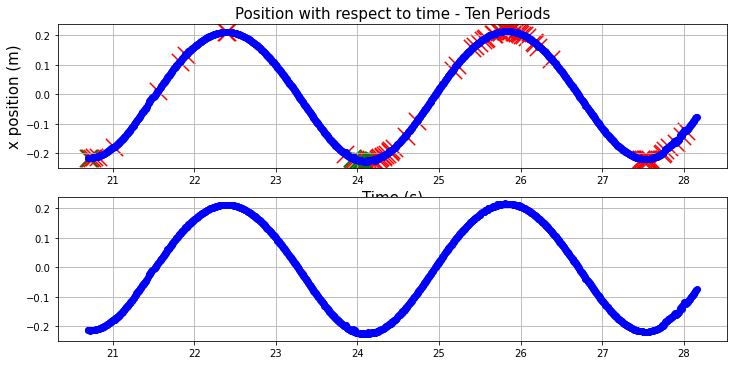

In [ ]:
plt.figure(figsize=(12,9))

plt.subplot(312)
plt.plot(t_p,x_p,marker="o",color="b")
plt.grid(True)
plt.scatter(t_p[peak],x_p[peak],marker="x",color="r",s=300, label="correctly identified peak")
plt.scatter(t_p[no_peak],x_p[no_peak],marker="x",color="g",s=300, label="possible peak")
plt.title("Position with respect to time - Ten Periods", size=text_size_plots)
plt.xlabel("Time (s)", size=text_size_plots)
plt.ylabel("x position (m)", size=text_size_plots)


plt.subplot(313)
plt.plot(t_p,x_p,marker="o",color="b")
plt.grid(True)
plt.scatter(t_p[t_x_p],x_p[argrelextrema(x_p, np.greater_equal)[0]], marker="x",color="r",s=300, label="correctly identified peaks")
plt.title("Position with respect to time - identified peaks (numpy.argrelextrema version)")
plt.xlabel("Time (s)", size=text_size_plots)
plt.ylabel("x position (m)", size=text_size_plots)
plt.legend()
plt.ylim()

plt.tight_layout()
plt.show()

In [ ]:
period = np.zeros(np.size(peak))
for z in range(0,np.size(peak)-1):
    period[z] = t_p[peak[0][z+1]]-t_p[peak[0][z]]
print("the period is:",period)
mode = np.median(period)
print("the mode is:",mode)
mean = np.mean(period)
print("the mean is:",mean)

the period is: [0.02834 0.02166 0.02    0.04667 0.20333 0.54334 0.26166 0.075   0.49667
 0.00833 1.44    0.10334 0.01833 0.095   0.03833 0.00834 0.01166 0.025
 0.02167 0.025   0.025   0.03333 0.01667 0.01167 0.03    0.01166 0.02167
 0.02    0.03333 0.00834 0.01333 0.03667 0.13833 0.13833 0.445   0.05
 0.18    0.04167 0.04167 0.05    0.025   0.00833 0.09167 0.01666 0.055
 0.02    0.00834 0.04666 0.01167 0.00833 0.025   0.01334 0.01166 0.03834
 0.01333 0.02833 0.01667 0.02167 0.02    0.02166 0.04167 0.07833 0.01334
 0.04166 0.15834 1.09666 0.00834 0.01666 0.025   0.02167 0.00833 0.00834
 0.00833 0.02    0.14667 0.00833 0.03333 0.045   0.085   0.07    0.04667
 0.     ]
the mode is: 0.02499999999999858
the mean is: 0.08928865853658538


In [ ]:
m = stats.mode(period)
print(m)

ModeResult(mode=array([0.00833]), count=array([5]))
